# Multi-class Classification Model
* More than 3 classes

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd
import itertools
from sklearn.datasets import *
from sklearn.metrics import confusion_matrix
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
print(tf.config.list_physical_devices('GPU'))
import random


[]


In [2]:
(train_data, train_labels),(test_data, test_lables) = fashion_mnist.load_data()

In [6]:
train_data[:1].shape

(1, 28, 28)

In [5]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankel boot"]

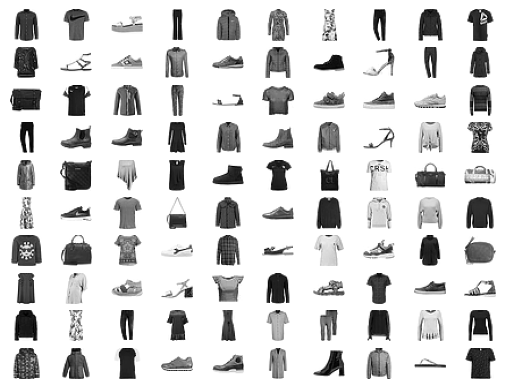

In [6]:
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    index = random.choice(range(len(train_data)))
    plt.imshow(train_data[index],cmap=plt.cm.binary)
    # plt.title(classes[train_labels[index]])
    plt.axis(False)

* Input shape = 28 x 28
* Output shape = 10
* Loss function = Categorical Cross Entropy
* Activation = Softmax

In [8]:
tf.random.set_seed(42)

In [ ]:
def plot(model, X: np.ndarray, y: np.ndarray):
    x_max, x_min = X[:, 0].max() + 0.1, X[:, 0].min() - 0.1
    y_max, y_min = X[:, 1].max() + 0.1, X[:, 1].min() - 0.1
    print("X max and min: ", x_max, x_min)
    print("Y max and min: ", y_max, y_min)
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    print("Dimension meshgrid: ", xx.shape, yy.shape)
    x_in = np.c_[xx.ravel(), yy.ravel()]
    print("Dimension ravel: ", x_in.shape)
    pred = model.predict(x_in)
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"Loss: {loss}\nAccuracy: {accuracy*100:2f}")

    if len(pred[0]) > 1:
        print("Multiclass")
        pred = np.argmax(pred, axis=1).reshape(xx.shape)
    else:
        print("Binary")
        pred = np.round(pred).reshape(xx.shape)

    plt.contourf(xx, yy, pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [4]:
test_lables.shape,test_data.shape , type(test_data)

((10000,), (10000, 28, 28), numpy.ndarray)

In [ ]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
#CategoricalCrossentropy() for one-hot labels only
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])


history = model.fit(
    train_data,
    train_labels,
    epochs=100,
    verbose=0,
    validation_data=(test_data, test_lables)
)

In [ ]:
train_data.min(), train_data.max()

# Neural networks tend to perform better when data is normalized or scaled between 0 and 1

In [9]:
# Normalizing the data
train_data_n = train_data/255.0
test_data_n = test_data/255.0

In [29]:
# Normalized dataset
norm_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
#CategoricalCrossentropy() for one-hot labels only
norm_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])


norm_history = norm_model.fit(
    train_data_n,
    train_labels,
    epochs=100,
    validation_data=(test_data_n, test_lables)
)


Epoch 1/100

1875/1875 [==============================] - 9s 5ms/step - loss: 0.9615 - accuracy: 0.6062 - val_loss: 0.6406 - val_accuracy: 0.7607
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5106 - accuracy: 0.8205 - val_loss: 0.5898 - val_accuracy: 0.7909
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4478 - accuracy: 0.8430 - val_loss: 0.4697 - val_accuracy: 0.8220
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4306 - accuracy: 0.8489 - val_loss: 0.5414 - val_accuracy: 0.8095
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4243 - accuracy: 0.8518 - val_loss: 0.4920 - val_accuracy: 0.8311
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4050 - accuracy: 0.8573 - val_loss: 0.4771 - val_accuracy: 0.8258
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4052 - accuracy: 0.8576 - val_loss: 0.4428 - val_

# Notes to self: Normalized data takes longer to train (100% increase in duration)

NameError: name 'history' is not defined

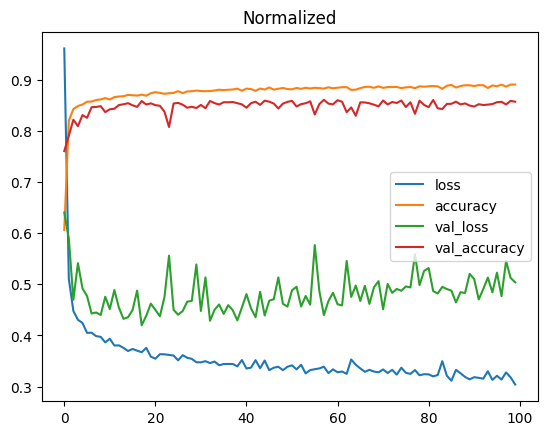

In [30]:
pd.DataFrame(norm_history.history).plot(title="Normalized")
pd.DataFrame(history.history).plot(title="Non normalized")
norm_model.evaluate(test_data_n,test_lables), model.evaluate(test_data,test_lables)


In [31]:
pred_norm = norm_model.predict(test_data_n)

313/313 [==============================] - 1s 2ms/step


In [32]:
pred_norm[:2], test_lables[:2]


(array([[2.2960903e-16, 1.6275394e-15, 3.0019647e-23, 9.1589079e-22,
         7.7997523e-18, 1.1302286e-05, 1.8135969e-21, 3.7579855e-04,
         8.3272312e-07, 9.9961203e-01],
        [2.9188855e-06, 3.0293472e-12, 9.9612480e-01, 1.5079013e-13,
         3.7012871e-03, 0.0000000e+00, 1.7098327e-04, 0.0000000e+00,
         3.6312875e-12, 0.0000000e+00]], dtype=float32),
 array([9, 2], dtype=uint8))

<Axes: >

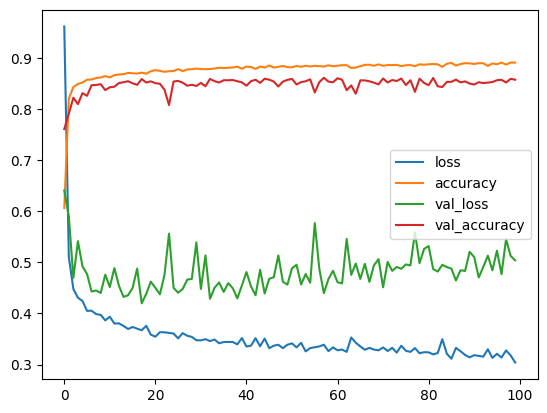

In [33]:
pd.DataFrame(norm_history.history).sort_values(by=["accuracy","loss"])
pd.DataFrame(norm_history.history).plot()

# Evaluation

In [34]:

def plot_conf_mat(cm: np.ndarray, classes=classes, figsize: tuple = (7, 7), cmap: plt.cm = plt.cm.Blues):
    cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)

    cax = ax.matshow(cm, cmap=cmap)
    fig.colorbar(cax)

    if classes is not None:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(title="Confusion Matrix",
           xlabel="Predicted",
           ylabel="Expected",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    ax.yaxis.label.set_size(10)
    ax.xaxis.label.set_size(10)
    thresh = (cm.max()+cm.min())/2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]} ({round(cm_norm[i,j]*100,2)}%)", horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",)

In [35]:
pred_norm = norm_model.predict(test_data_n)



313/313 [==============================] - 1s 3ms/step


(array([9.9190837e-01, 2.2196820e-08, 4.0975980e-08, 2.9201718e-04,
        2.7624092e-10, 4.8448570e-27, 7.7995420e-03, 0.0000000e+00,
        4.1609641e-13, 0.0000000e+00], dtype=float32),
 'T-shirt/top')

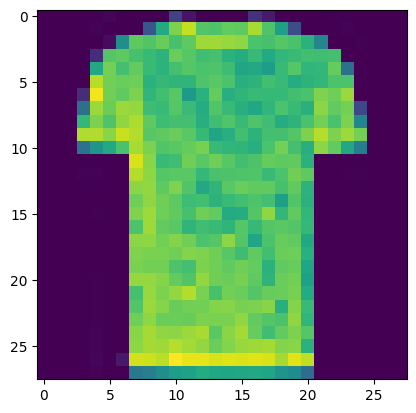

In [36]:
nn = 125
plt.imshow(test_data[nn])
pred_norm[nn],classes[tf.argmax(pred_norm[nn])]

In [37]:
# convrting preds to appropirate format and shape for conf mat
preds_conv = pred_norm.argmax(axis=1)
preds_conv, test_lables

(array([9, 2, 1, ..., 8, 1, 5], dtype=int64),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [38]:
cm = confusion_matrix(test_lables,preds_conv)
cm

array([[730,   0,  13,  22,   2,   2, 222,   0,   9,   0],
       [  4, 957,   3,  26,   4,   0,   4,   0,   2,   0],
       [  8,   2, 790,  14,  89,   0,  93,   1,   3,   0],
       [ 36,   4,  11, 864,  40,   0,  40,   2,   3,   0],
       [  0,   0, 153,  30, 749,   0,  67,   0,   1,   0],
       [  0,   0,   0,   0,   0, 937,   1,  27,   8,  27],
       [ 80,   1, 114,  29,  74,   0, 690,   0,  12,   0],
       [  0,   0,   0,   0,   0,  28,   0, 942,   2,  28],
       [  0,   0,   6,   4,   3,   2,  19,   4, 962,   0],
       [  0,   0,   0,   0,   0,   6,   1,  41,   0, 952]], dtype=int64)

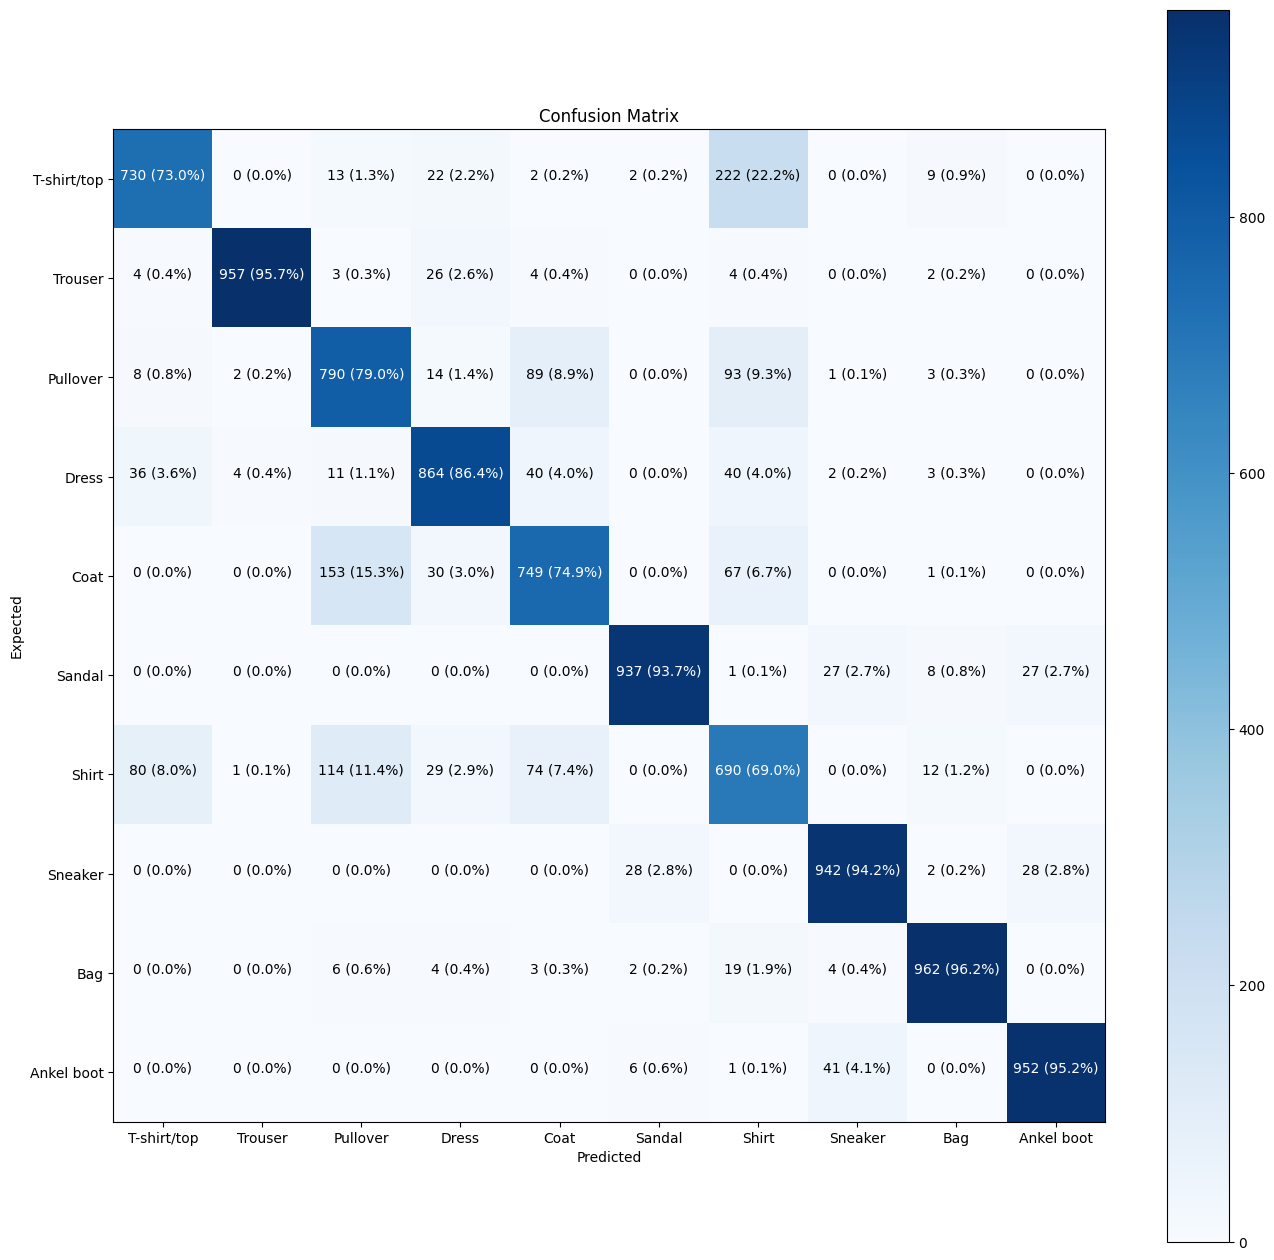

In [39]:
plot_conf_mat(cm,figsize=(16,16))

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [11]:
tf.saved_model.save(norm_model,"./saved_models/MultiClass")

NameError: name 'norm_model' is not defined

In [63]:
keras.models.save_model(norm_model,filepath="./save_models/KerasMultiClass")

INFO:tensorflow:Assets written to: ./save_models/KerasMultiClass\assets


INFO:tensorflow:Assets written to: ./save_models/KerasMultiClass\assets


In [15]:
model = tf.saved_model.load("./saved_models/MultiClass")

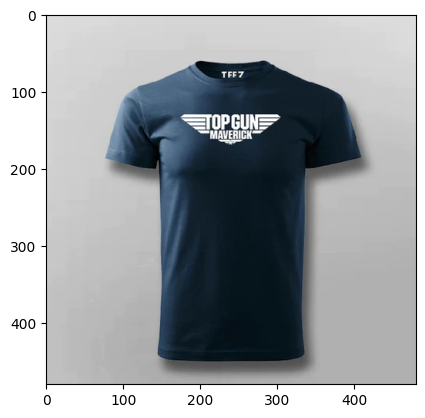

In [16]:
image_path = 'test2.jpg'
img = plt.imread(image_path)
plt.imshow(img)

In [17]:
height, width = 28, 28
img = keras.preprocessing.image.load_img(image_path, target_size=(height, width))
img_array = keras.preprocessing.image.img_to_array(img)
plt.imshow(img)
img_array = tf.image.rgb_to_grayscale(img_array)
img_array = tf.reshape(img_array,(28,28))
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
img_array /= 255.0


AttributeError: module 'keras.src.backend' has no attribute 'image_data_format'

In [79]:
predictions = model(img_array)
predictions

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [78]:
predicted_class_index = tf.argmax(predictions, axis=1)
predicted_class_label = classes[predicted_class_index.numpy()[0]]
print(f'Predicted class: {predicted_class_label}')

Predicted class: Sandal


# Freezing the model graph and generating GraphDef and Protobuf

In [41]:
import tensorflow as tf
dir = "./saved_models/MultiClass"
frozen_dir = "./frozen_model/frozen_inference.pb"
pbtxt_dir = "./frozen_model/model.pbtxt"
classes_file_path = './frozen_model/classes.names'


In [42]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankel boot"]

In [43]:
model = tf.saved_model.load(dir)


In [44]:
concrete_function = model.signatures[tf.saved_model.DEFAULT_SERVING_SIGNATURE_DEF_KEY]
frozen_graph_def = concrete_function.graph.as_graph_def()

In [45]:
# Write the frozen graph to a file
with tf.io.gfile.GFile(frozen_dir, 'wb') as f:
    f.write(frozen_graph_def.SerializeToString())

# Generate the pbtxt file
with tf.io.gfile.GFile(pbtxt_dir, 'w') as f:
    f.write(str(frozen_graph_def))



In [46]:

# Write class names to the file
with open(classes_file_path, 'w') as file:
    for class_name in class_names:
        file.write(f'{class_name}\n')

In [47]:
"Done"

'Done'